<a href="https://colab.research.google.com/github/PhiWhyyy/Hybrid-program-for-image-compression-in-SVD-and-DWT/blob/main/SVD%2BDWT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import pywt
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [4]:
# prompt: i want to link this project to a git clone

# Clone the git repository
!git clone https://github.com/PhiWhyyy/Hybrid-program-for-image-compression-in-SVD-and-DWT

# Change directory to the repository
%cd your_repo

# Link the project to the git repository
!git init
!git add .
!git commit -m "Initial commit"
!git remote add origin https://github.com/PhiWhyyy/Hybrid-program-for-image-compression-in-SVD-and-DWT
!git push -u origin master


fatal: destination path 'Hybrid-program-for-image-compression-in-SVD-and-DWT' already exists and is not an empty directory.
[Errno 2] No such file or directory: 'your_repo'
/content
Reinitialized existing Git repository in /content/.git/
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@6b37ddba2e52.(none)')
error: remote origin already exists.
error: src refspec master does not match any
error: failed to push some refs to 'https://github.com/your_username/your_repo.git'


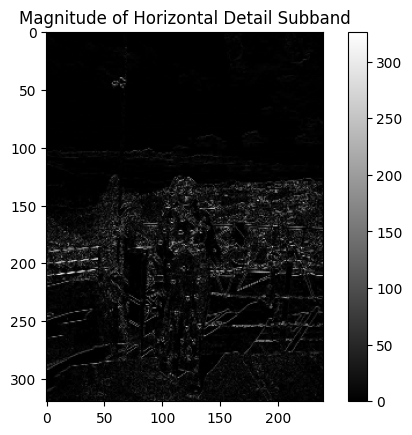

Singular values for horizontal subband: [1770.95086129 1597.56450342 1510.85503086 1368.14705185 1347.63233253
 1312.43331855 1251.123674   1233.33038373 1192.11351141 1168.18306109
 1147.34474665 1118.05295001 1081.64451128 1060.10369347 1050.52198877
 1039.429135   1014.79925312  980.02376326  977.20400942  964.97981918
  923.88018277  920.87481724  913.95834548  899.01185575  880.58482995
  876.75105675  869.91037766  852.0138607   848.52716004  824.49775091
  815.95617097  802.51292921  790.31213661  783.48179464  767.80880811
  758.79973662  754.20247016  746.63418593  726.74878564  720.91812227
  712.54744707  702.63370653  698.42824687  684.61266183  677.50124107
  675.35906538  672.59491999  654.64133928  652.81108069  644.78672967
  641.74893524  627.70524137  620.26957754  608.44244579  601.54063741
  591.26451418  582.10955344  577.31188595  575.29657678  569.45206094
  566.18068881  558.79970582  551.61294133  540.57566797  536.08132076
  523.13623523  519.10825164  514.408

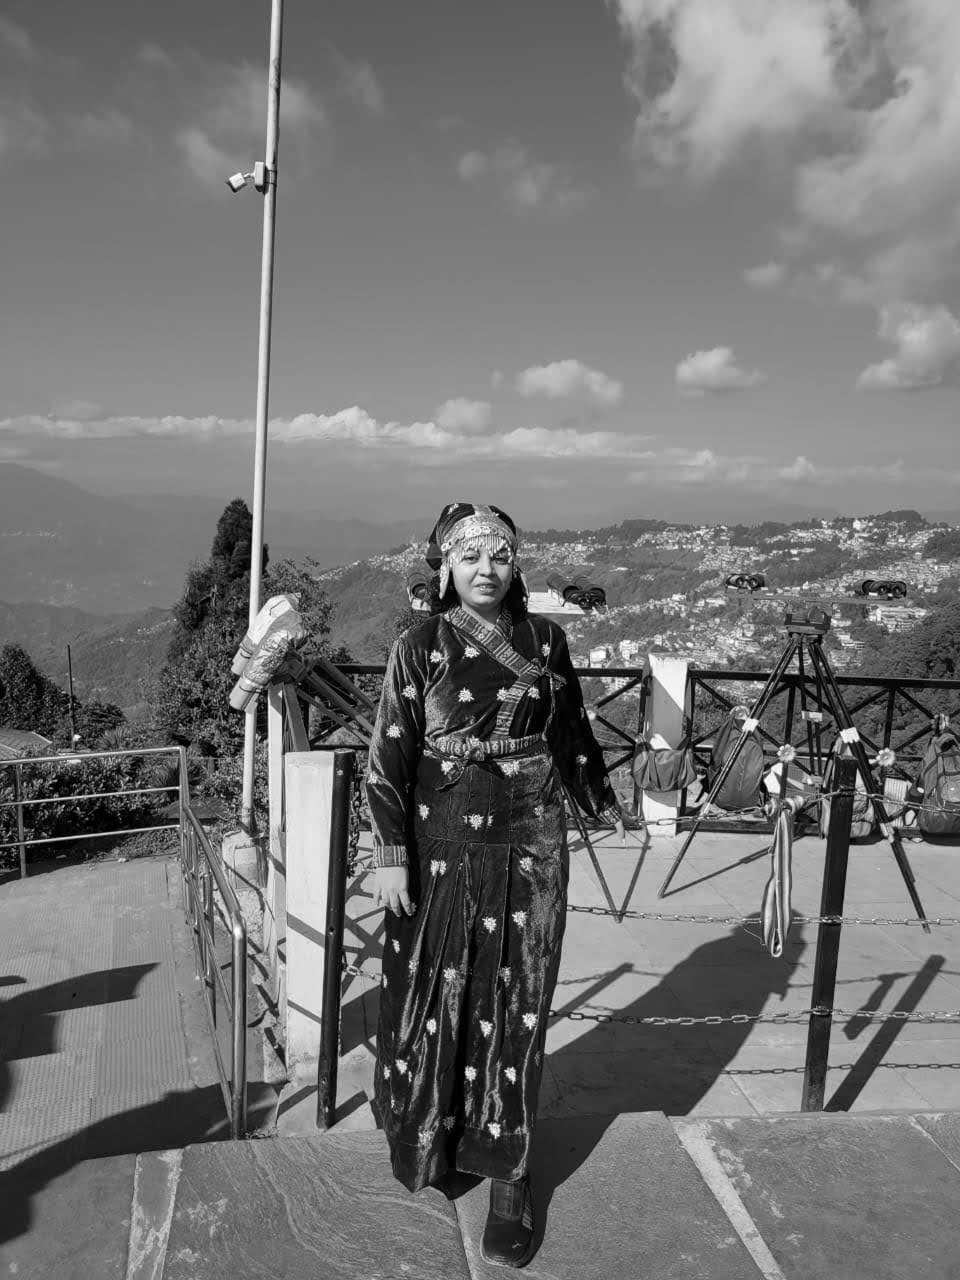

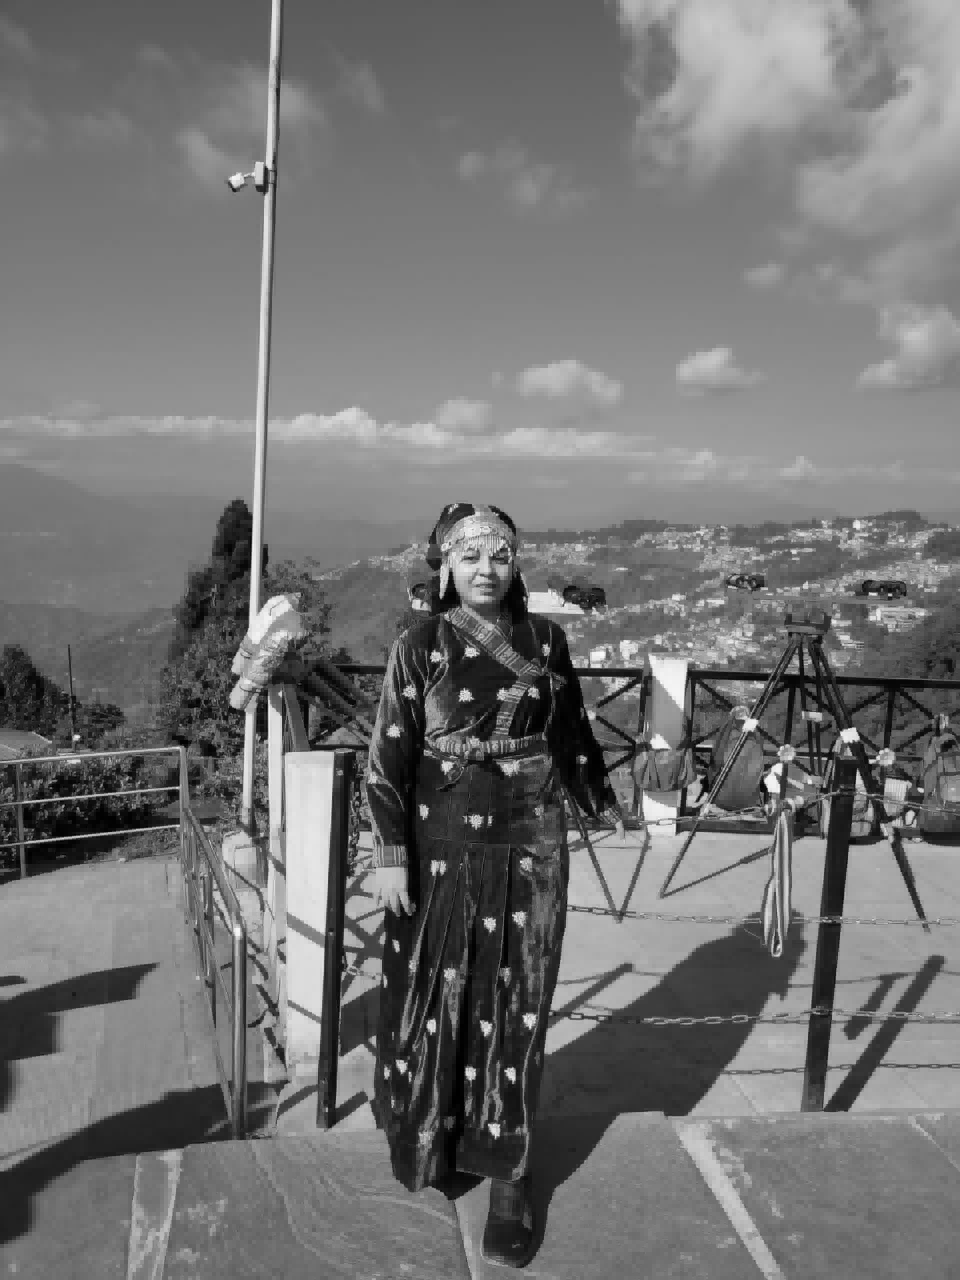

-1

In [5]:

# Load the image
img = cv2.imread("/content/IMG-20231030-WA0198.jpg")

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Set the compression ratio to 0
compression_ratio = 0.1

# Perform the wavelet decomposition to obtain the subbands
coeffs = pywt.wavedec2(gray_img, 'haar', level=2)
# Extract the horizontal detail subband coefficients
cH = coeffs[1][0]

# Calculate the magnitude of the wavelet coefficients
magnitude = np.abs(cH)

# Plot the magnitude of the wavelet coefficients
plt.imshow(magnitude, cmap='gray')
plt.title('Magnitude of Horizontal Detail Subband')
plt.colorbar()
plt.show()
# Perform SVD on each subband and compress using desired ratio
compressed_coeffs = []
for i in range(1, len(coeffs)):
    cH, cV, cD = coeffs[i]
    U_h, S_h, Vt_h = np.linalg.svd(cH)
    U_v, S_v, Vt_v = np.linalg.svd(cV)
    U_d, S_d, Vt_d = np.linalg.svd(cD)
    print("Singular values for horizontal subband:", S_h)
    print("Singular values for vertical subband:", S_v)
    print("Singular values for diagonal subband:", S_d)
    threshold = np.max(np.abs(cH)) * compression_ratio
    compressed_coeff = [pywt.threshold(cH, threshold, mode='soft'),
                        pywt.threshold(cV, threshold, mode='soft'),
                        pywt.threshold(cD, threshold, mode='soft')]
    compressed_coeffs.append(tuple(compressed_coeff))
num_singular_values_retained = int(compression_ratio * len(S_h))
print("Number of singular values:",num_singular_values_retained)
# Reconstruct the compressed image from the compressed coefficients
compressed_img = pywt.waverec2([coeffs[0]] + compressed_coeffs, 'haar')

# Display the original and compressed images side by side
cv2_imshow(gray_img)
cv2_imshow(compressed_img)
cv2.waitKey(0)